imported libraries

In [1]:
import datetime,spacy
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from cleantext import clean
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score,StratifiedKFold,train_test_split,StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,recall_score

# Problem Statement:
## To test and see what model will predict the best score.
- **I have chosen these models and will find the best score among them.**
- RandomForestClassifier
- KNeighborsClassifier
- LogisticRegressionCV
- GradientBoostingClassifier

### Scenario
- You're fresh out of your Data Science bootcamp and looking to break through in the world of freelance data journalism. Nate Silver and co. at FiveThirtyEight have agreed to hear your pitch for a story in two weeks!

- Your piece is going to be on how to create a Reddit post that will get the most engagement from Reddit users. Because this is FiveThirtyEight, you're going to have to get data and analyze it in order to make a compelling narrative.

---
## importing reddit scrape csv

- I am importing my csv files from my scraper textfile that collected all the subreddit posts.
- I make create a database(db) for my posts.

In [2]:
pd.read_csv('../Project_csv_files/project_3_scraped_dataframe.csv').shape
db = pd.read_csv('../Project_csv_files/project_3_scraped_dataframe.csv')
db.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,id,title,text,num_comments,upvotes,time_posted,time_now,time_delta,subreddit
0,0,0.0,0.0,0.0,0.0,0.0,v2u206,Ukraine's first lady tells ABC News that givin...,NaN,948,24472,1.654124e+09,2022-06-02 03:56:36.604442,0 days 04:58:30.604442,worldnews
1,1,1.0,1.0,1.0,1.0,1.0,v2tbt6,Apparent active shooter at medical facility in...,NaN,6814,35355,1.654122e+09,2022-06-02 03:56:36.604442,0 days 05:30:12.604442,news
2,2,2.0,2.0,2.0,2.0,2.0,v2v04f,Dude Throws A Cup Of Urine Into Crowd…..,NaN,888,15804,1.654127e+09,2022-06-02 03:56:36.604442,0 days 04:17:28.604442,WinStupidPrizes
3,3,3.0,3.0,3.0,3.0,3.0,v2swvd,First night in her forever home!,NaN,508,61769,1.654121e+09,2022-06-02 03:56:36.604442,0 days 05:48:08.604442,MadeMeSmile
4,4,4.0,4.0,4.0,4.0,4.0,v2sknf,TIL that Napster issued a cease and desist ord...,NaN,791,17264,1.654120e+09,2022-06-02 03:56:36.604442,0 days 06:01:57.604442,todayilearned


count    22758.000000
mean        64.083795
std        386.333085
min          0.000000
25%          7.000000
50%         18.000000
75%         47.000000
max      28964.000000
Name: num_comments, dtype: float64


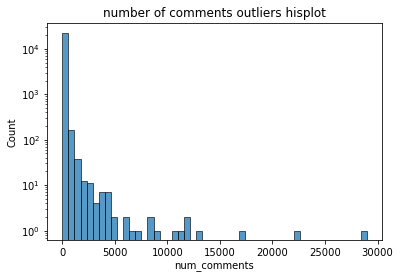

In [3]:
print(db.num_comments.describe())
sns.histplot(db.num_comments,log_scale=(False,True),bins=50).set(title='number of comments outliers hisplot')
plt.savefig('num_coms_outliers_histplot.png');

- Here we can see the number of comments each post has. 
- On the bottom of the graph you can see outliers that are past 5,000 to 28,000.
- We dont want these as they are abnormal and arent consistent like the other posts that have 0-5000 comments per post.

,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,id,title,text,num_comments,upvotes,time_posted,time_now,time_delta,subreddit
85,87,87,87.0,87.0,87.0,87.0,87.0,v2lpdw,Elon Musk just asked all employees to return t...,Elon Musk just emailed everyone “you are expec...,1717,11477,1.654103e+09,2022-06-02 03:56:36.604442,0 days 10:55:52.604442,cscareerquestions
88,90,90,90.0,90.0,90.0,90.0,90.0,v2lbwd,I just demanded that my doctor provide me with...,"**Edit: I’m talking about a colposcopy, not a ...",1761,18370,1.654102e+09,2022-06-02 03:56:36.604442,0 days 11:11:58.604442,TwoXChromosomes
106,109,109,109.0,109.0,109.0,109.0,109.0,v2waae,"Dogs can smell COVID infections in patients, w...",You'd just have to build a detector sensitive ...,250,1689,1.654130e+09,2022-06-02 03:56:38.965942,0 days 03:17:15.965942,askscience
126,129,129,129.0,129.0,129.0,129.0,129.0,v2qnt1,In-laws constantly berate my baking skills in ...,I posted this on r/AmITheAsshole and was told ...,174,3358,1.654116e+09,2022-06-02 03:56:38.965942,0 days 07:24:16.965942,pettyrevenge
134,137,137,137.0,137.0,137.0,137.0,137.0,v2p39d,Pretty sure I’m in love with my roommate and I...,"I am NOT OP, this is a repost. [Original](http...",266,3996,1.654112e+09,2022-06-02 03:56:38.965942,0 days 08:30:58.965942,BestofRedditorUpdates
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7238,7249,7249,7249.0,7249.0,7249.0,7255.0,7255.0,v2rq2r,thanks ceo matt furlong we love you too,Matt furlong said we mattered on the earnings ...,23,304,1.654118e+09,2022-06-02 03:59:25.926828,0 days 06:41:24.926828,Superstonk
7240,7251,7251,7251.0,7251.0,7251.0,7257.0,7257.0,v2xoqg,When they insult you with tomorrow’s complimen...,Let’s talk about memes from a linguistic stan...,12,125,1.654135e+09,2022-06-02 03:59:25.926828,0 days 02:10:07.926828,Superstonk
7261,7272,7272,7272.0,7272.0,7272.0,7278.0,7278.0,v2uebo,"50,000 shares DRS’d/day for 76 days straight???","Am I retarded, or does that math actually chec...",24,183,1.654125e+09,2022-06-02 03:59:25.926828,0 days 04:46:11.926828,Superstonk
7267,7278,7278,7278.0,7278.0,7278.0,7284.0,7284.0,v2uop4,HOLY MOLY! Missed this but Netherlands school ...,&#x200B;\n\nhttps://preview.redd.it/k85s8xvnc3...,10,173,1.654126e+09,2022-06-02 03:59:25.926828,0 days 04:33:57.926828,Superstonk


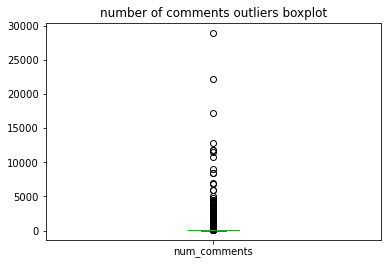

In [4]:
db['num_comments'].plot(kind='box', title='number of comments outliers boxplot')
plt.savefig('num_coms_outliers_boxplot.png');

db = db[db.num_comments < 5000]
db.reset_index(inplace=True)
db.dropna()

- We want to keep the outliers to a more realistic bare minimum, we will create a filter to get rid of any post that has 5000+ comments, they are considered noise and will make our model scores less accurate.
- We will also drop all the NA's to make sure our model will not have 

In [5]:
print(db.text.isnull().sum()/db.shape[0])

0.9504880837217483


- Text column is 95% null values, meaning 95% of the posts have no text, so we will drop this column as it is practically useless to throw in the model. 

- Unnamed columns are just irrelevent stuff from appending and scraped csv

## Creating a new DataFrame(df) from DataBase(db) only including the index rows I want to use.

In [6]:
df = db[['title', 'subreddit','num_comments','time_posted']].dropna()

## Cleaning Title in df

https://pypi.org/project/clean-text/

In [7]:
df['title'] = [clean(title,
                    fix_unicode=True,               # fix various unicode errors
                    to_ascii=True,                  # transliterate to closest ASCII representation
                    lower=True,                     # lowercase text
                    no_line_breaks=False,           # fully strip line breaks as opposed to only normalizing them
                    no_urls=False,                  # replace all URLs with a special token
                    no_emails=False,                # replace all email addresses with a special token
                    no_phone_numbers=False,         # replace all phone numbers with a special token
                    no_numbers=False,               # replace all numbers with a special token
                    no_digits=False,                # replace all digits with a special token
                    no_currency_symbols=False,      # replace all currency symbols with a special token
                    no_punct=False,                 # remove punctuations
                    replace_with_punct="",          # instead of removing punctuations you may replace them
                    replace_with_url="<URL>",
                    replace_with_email="<EMAIL>",
                    replace_with_phone_number="<PHONE>",
                    replace_with_number="<NUMBER>",
                    replace_with_digit="0",
                    replace_with_currency_symbol="<CUR>",
                    lang="en"         
                   )for title in df['title']]
df.head(10)

,title,subreddit,num_comments,time_posted
0,ukraine's first lady tells abc news that givin...,worldnews,948,1.654124e+09
1,dude throws a cup of urine into crowd.....,WinStupidPrizes,888,1.654127e+09
2,first night in her forever home!,MadeMeSmile,508,1.654121e+09
3,til that napster issued a cease and desist ord...,todayilearned,791,1.654120e+09
4,[oc] a pic i took of my husband with all the b...,pics,3584,1.654119e+09
5,always carry bear spray when you're in their t...,ThatsInsane,907,1.654127e+09
6,an interesting take on our justice system,WhitePeopleTwitter,113,1.654124e+09
7,"married couple in harlem, nyc in the early 195...",OldSchoolCool,96,1.654126e+09
8,"it's necessary to suppress the poor voters, duh!",facepalm,826,1.654120e+09
9,"welcome to the casino, amber!",wallstreetbets,258,1.654124e+09


Referencing link where I got this function to clean my df

This will get rid of unecessary weight in the title such as:
- fix various unicode errors
- transliterate to closest ASCII representation
- lowercase text
- fully strip line breaks as opposed to only normalizing them
- replace all URLs with a special token
- replace all email addresses with a special token
- replace all phone numbers with a special token
- replace all numbers with a special token
- replace all digits with a special token
- replace all currency symbols with a special token
- remove punctuations
- instead of removing punctuations you may replace them

**Dropped emojis in title column**

https://www.educative.io/edpresso/how-to-remove-emoji-from-the-text-in-python

In [8]:
df['title'] = [clean(title, no_emoji=True) for title in df['title']]

- link above referencing to the comprehension list used to remove emojis (above)
- I wont be needing emoji's wont really do much in my model, most likely mess up my model scores too.

**Converting time_posted**

In [9]:
# convert times
df['time_posted'] = df.time_posted.apply(lambda x: datetime.datetime.utcfromtimestamp(x))
[df.time_posted[0].timestamp()]
df['time_posted'] = [time.timestamp() for time in df['time_posted']]

- converting time_posted to utc time, making time_posted dtype a float so will run in my models.

**dummy subreddit**

- Only using the top 10 subreddits as 3000+ index rows is going to be extra unecessary noise and will make the models run slower.
- Dummify subreddit to 0' and 1's so the model can process it and get a score.

In [10]:
df.num_comments.sort_values(ascending=False) 

subreddit_top10 = df.groupby('subreddit').mean().sort_values('num_comments', ascending=False)['num_comments'][:10]
top10 = [sub for sub in subreddit_top10.index]

subreddit_top10.index

Index(['AskReddit', 'RoastMe', 'unpopularopinion', 'OutOfTheLoop',
       'NoStupidQuestions', 'clevercomebacks', 'cscareerquestions', 'dndnext',
       'videos', 'tulsa'],
      dtype='object', name='subreddit')

- **Top 10 subreddits are above**

**grabbing top 10 subreddits**

In [11]:
dum = pd.get_dummies(df, columns=['subreddit'], drop_first=True)
top10_filter = [col for col in dum.columns if col.replace('subreddit_', '') in top10]
dum = dum[top10_filter]

- Top 10 subreddits will be used in the subreddit and discarding the rest as too much noise for the models.

**Lemmatizing title**

- Grouping together words, converts words into their base forms.
- The aim is to take away inflectional suffixes and prefixes to bring out the word’s dictionary form.
- Creating nlp library, aka spacy

In [12]:
nlp = spacy.load('en_core_web_sm')

- Lemmatize title.

In [13]:
df['lemmatized_title'] = [' '.join([word.lemma_ for word in nlp(title)]) for title in df['title']]

final_df = df.join(dum).drop('subreddit', axis=1)

---
# Creating X

### Instantiate Tfid Vecotrizing 
- Common words are penalized
- Rare words have more influence
- Eliminate 'stop_words' to improve our analysis. 
- If you pass, say, 100 to max_features, that would mean creating a feature matrix out of the most 100 frequent words accross text documents.
  Which is what the model will work with.
#
- The new DataFrame(dft) Is tvec df['lemmatized_title'], New DataFrame(dft) Is tvec df['lemmatized_title']
- I will be joining final_df while dropping columns with dft to create final_df_vector, joining final_df while dropping columns with dft to create final_df_vector


In [14]:
tvec = TfidfVectorizer(stop_words='english',
                       strip_accents='ascii',
                       max_features=100,
                       # max_df = .80,
                       norm='l2')
tvec.fit(final_df['lemmatized_title'])
final_df['title'].shape

# New DataFrame(dft) Is tvec df['lemmatized_title']
dft = pd.DataFrame(tvec.transform(final_df['lemmatized_title']).todense(),
                  columns=tvec.get_feature_names())

# joining final_df while dropping columns with dft to create final_df_vector
final_df_vector = dft.join(final_df.drop(columns=['title', 'lemmatized_title']))
final_df_vector.head(4)

,10,2022,art,ask,baby,bad,big,boy,buy,car,...,subreddit_AskReddit,subreddit_NoStupidQuestions,subreddit_OutOfTheLoop,subreddit_RoastMe,subreddit_clevercomebacks,subreddit_cscareerquestions,subreddit_dndnext,subreddit_tulsa,subreddit_unpopularopinion,subreddit_videos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


**Scailing time_posted to time_posted_scale to be on sthe same scale as other features.**

In [15]:
Min_Max = MinMaxScaler()
Min_Max.fit_transform(final_df_vector[['time_posted']])
Scale_Time = Min_Max.fit_transform(final_df_vector[['time_posted']])
final_df_vector['time_posted_scaled'] = Scale_Time 

In [16]:
final_df_vector['time_posted']

0        1.654124e+09
1        1.654127e+09
2        1.654121e+09
3        1.654120e+09
4        1.654119e+09
             ...     
22737    1.654231e+09
22738    1.654213e+09
22739    1.654214e+09
22740    1.654216e+09
22741    1.654231e+09
Name: time_posted, Length: 22742, dtype: float64

In [17]:
final_df_vector['time_posted_scaled']

0        0.378659
1        0.392317
2        0.362139
3        0.357540
4        0.351344
           ...   
22737    0.972241
22738    0.868255
22739    0.874213
22740    0.886650
22741    0.970649
Name: time_posted_scaled, Length: 22742, dtype: float64

In [18]:
final_df_vector.head()

,10,2022,art,ask,baby,bad,big,boy,buy,car,...,subreddit_NoStupidQuestions,subreddit_OutOfTheLoop,subreddit_RoastMe,subreddit_clevercomebacks,subreddit_cscareerquestions,subreddit_dndnext,subreddit_tulsa,subreddit_unpopularopinion,subreddit_videos,time_posted_scaled
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.378659
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.392317
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.362139
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.357540
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.351344


---
# Creating y

In [19]:
final_df_vector['target'] = [1 if value > final_df_vector['num_comments'].median() else 0 for value in final_df_vector['num_comments']]
final_df_vector['target'].head(4)

0    1
1    1
2    1
3    1
Name: target, dtype: int64

- df['target'] is df['num_comments'] median which is the middle of the data of num_comments.
- Anything above the median(50%) of num_comments will be considered hot posts.
- Those less than the median will be not hot posts.

---
# Visualization and eda

- Distributions examined.
- Now that is much better! all the outliers(5,000+) are gone from when we filtered them, now we have clean data.

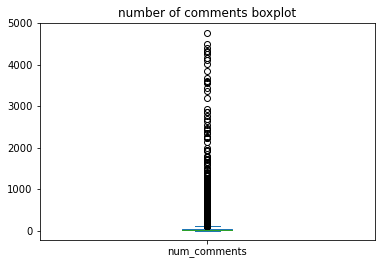

In [20]:
df['num_comments'].plot(kind='box', title='number of comments boxplot')
plt.savefig('num_coms_boxplot.png');

count    22742.000000
mean        56.045511
std        172.955392
min          0.000000
25%          7.000000
50%         18.000000
75%         46.000000
max       4764.000000
Name: num_comments, dtype: float64


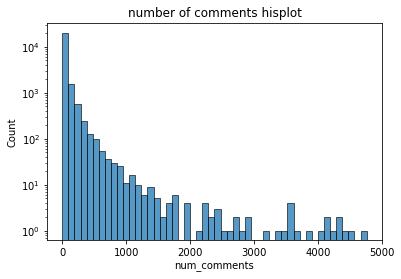

In [21]:
print(df.num_comments.describe())
sns.histplot(df.num_comments,log_scale=(False,True),bins=50).set(title='number of comments hisplot')
plt.savefig('num_com_histplot.png');

### Interpretation:
- Now you cant see those massive outliers and our dataframe(df) only contains posts with 5,000 comments max as the limit.
- The count was originally 22758 we have dropped 16 outliers that were above the 5000 comment limit now we have  22742 index rows of num_comments
- The most highest post with num_comments is from Max in .describe( ) which contains 4764 comments for one post.
- In the histogram bar plot, we can see majority of comments(10^4 is 10,000. We have 17,000+) are less than a 1000, and the ones like the max(4764) appear insignificant among majority.

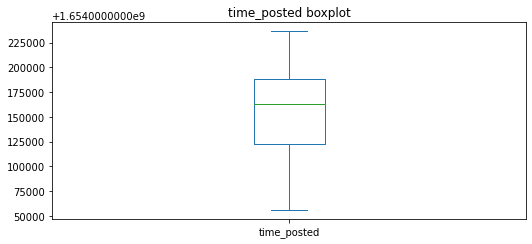

In [22]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
# Plot the dataframe
ax = df[['time_posted']].plot(kind='box', title='time_posted boxplot')
# Display the plot
plt.savefig('time_posted_boxplot.png');

count    2.274200e+04
mean     1.654157e+09
std      4.141790e+04
min      1.654056e+09
25%      1.654122e+09
50%      1.654163e+09
75%      1.654188e+09
max      1.654236e+09
Name: time_posted, dtype: float64


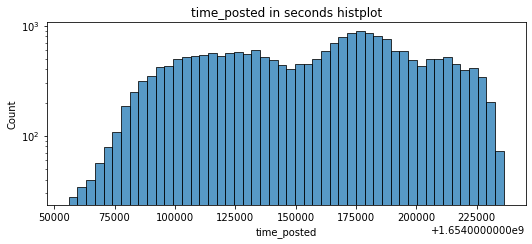

In [23]:
print(df['time_posted'].describe())
sns.histplot(df['time_posted'],log_scale=(False,True),bins=50).set(title='time_posted in seconds histplot')
plt.savefig('time_posted_seconds_histplot.png');

**interpretation**
- Distribution has definite changes with less occurrences. The shape of the distributions have changed as well while still keeping a near consistent shape pattern. There is a big spike around 175000 seconds which is around 48 hours after the post has been up they get more comments around the 2 day mark.

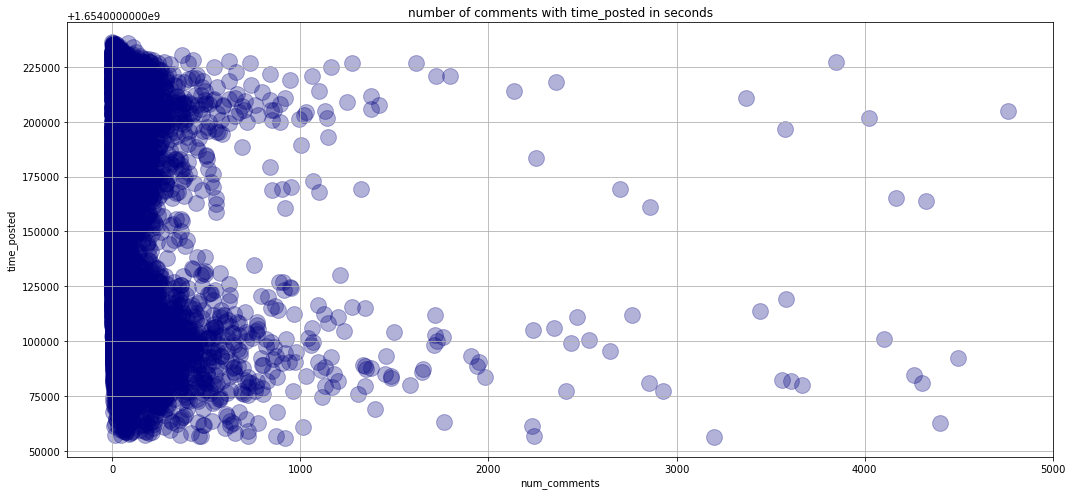

In [24]:
df.plot(x='num_comments', y='time_posted',
              kind='scatter',
              figsize=(15, 7),
              s=250,
              alpha=0.30,
              color='navy')
plt.title('number of comments with time_posted in seconds')
plt.grid()
plt.savefig('num_coms_time_posted.png');

**interpretation**
- The time_posted display number of seconds elapesed in unix epoch.
- It appears that time_posted correlation with num_comments, yet it appears that the longer a post has been up does not affect the increase of num_comments after a certain amount of time elapsed(within 48hours).

# Random Forests modeling 

- X is the features([title, subreddit(top10), time_posted_scale]) excluding time_posted & num_comments(target).
- y is the target(num_comments).
- split train and test X and y.

In [25]:
X = final_df_vector.drop(columns=['target', 'num_comments', 'time_posted'])
y = final_df_vector['target']

# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

## base line is 51.43%
- y_test.mean() is majority class!
- We do 1- as most of our post vectorised(1 or 0) are mojority in negatives, if we didnt minus 1 the baseline would be 49% instead.

In [26]:
1 - y_test.mean()

0.5187953396350846

**My models**
- **I have chosen these models and will find the best score among them.**
- RandomForestClassifier
- KNeighborsClassifier
- LogisticRegression
- GradientBoostingClassifier

In [27]:
%%time

# models
print('Simulating Random Forest')
rf = RandomForestClassifier(class_weight='balanced',
                            max_depth=30,
                            n_estimators=300,
                            n_jobs=-1)
print('Simulated Random Forest')

print('Simulating KNeighbors Classifier')
knn = KNeighborsClassifier(n_jobs=-1)
print('Simulated KNeighbors Classifie')

print('Simulating Logistic Regression')
logreg = LogisticRegressionCV(n_jobs=-1)
print('Simulated Logistic Regression')

print('Simulatinb Gradient Boosting Classifier')
gb = GradientBoostingClassifier(learning_rate=0.1)
print('Simulated Gradient Boosting Classifier')

#-----------------------------------------------------#

print('fitting the models and scores for X and y')
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

gb.fit(X_train, y_train)
gb.score(X_test, y_test) 

#-----------------------------------------------------#

# function declaring model type and name for printing scores
print('declaring model type')
def score(model, name, X, y):
    cv = StratifiedKFold(n_splits=3,
                        random_state=40,
                        shuffle=True)
    s = cross_val_score(model, X, y, cv=cv,n_jobs=-1)
    print("{} Score:\t{:0.2} ± {:0.2}".format(name, s.mean(), 2 * s.std()))

Simulating Random Forest
Simulated Random Forest
Simulating KNeighbors Classifier
Simulated KNeighbors Classifie
Simulating Logistic Regression
Simulated Logistic Regression
Simulatinb Gradient Boosting Classifier
Simulated Gradient Boosting Classifier
fitting the models and scores for X and y
declaring model type
Wall time: 9.38 s


**baseline = 51.43% y median of num_comments is above 51.43% is hot and below is not hot**

- Scores of each model
- score is: NUMBER ± (Higher the number the more accurate the score is)
- and confidence intaval is: ± NUMBER(lower the percentage the more confident the model is the accuracy of the score)

In [28]:
%%time
print('score for Random Forest')
score(rf, 'Random Forest', X, y)
print(' ')

print('score for Gradient Boosting Classifier')
score(gb, 'Gradient Boosting Classifier', X, y)
print(' ')

print('score for KNeighbors Classifier')
score(knn, 'KNeighbors Classifier', X , y)
print(' ')

print('score for Logistic Regression')
score(logreg, 'Logistic Regression', X , y)
print('Logistic Regression intercept:', logreg.intercept_)
print('Logistic Regression coef(s):', logreg.coef_)
print(' ')

score for Random Forest
Random Forest Score:	0.65 ± 0.0077
 
score for Gradient Boosting Classifier
Gradient Boosting Classifier Score:	0.66 ± 0.011
 
score for KNeighbors Classifier
KNeighbors Classifier Score:	0.6 ± 0.0085
 
score for Logistic Regression
Logistic Regression Score:	0.6 ± 0.0033
Logistic Regression intercept: [0.08082249]
Logistic Regression coef(s): [[ 0.00316664  0.01249189 -0.01439719  0.00707708 -0.00802582  0.00612182
   0.0056416   0.00129767  0.00282644  0.00638785 -0.00943549  0.00910542
   0.00354158 -0.00576038 -0.00684192  0.01073382  0.00437638  0.00445814
   0.01269752  0.00468651 -0.00287311  0.02614026  0.00387931  0.00490519
   0.00161576  0.01505887  0.01325696 -0.00056706 -0.00576305  0.00393644
   0.00491503  0.0094228   0.00379176 -0.00145354  0.00071899  0.00581343
   0.01175594  0.01134574  0.00108747  0.01746697  0.01002389  0.00344291
   0.00423223  0.00244175 -0.01112534  0.00087445  0.00492506  0.00843594
  -0.00388146  0.00452343  0.021135   

**Interpretations of models**
- The higher the time_posted is the less likely the positive class.

- Gradient Boosting Classifier has the best overall score with confidence interval for the data scraped at hand.

- Logistic Regression has the worse score yet the best confidence interval.

Does the student explain how the model works and evaluate its performance successes/downfalls?

### Random Forest
- Random Forest is the 2nd best model score with the worse confidence interval.
**Advantages**
- Be used to solve both classification as well as regression problems.
- Works well with both categorical and continuous variables.
- Can automatically handle missing values.
- Less impacted by noise.
- Robust to outliers.

**Disadvantages**
- Complexity
- Longer Training Period

### KNeighbors Classifier
- KNeighbors Classifier is the 3rd best score with the second best confidence interval.
**Advantages**
- No Training Period
- Easy ImplementationEasy Implementation
**Disadvantages**
- Does not work well with large datasetDoes not work well with large dataset
- Does not work well with high dimensionalityDoes not work well with high dimensionality
- Sensitive to noisy and missing dataSensitive to noisy and missing data

### Logistic RegressionLogistic Regression
- Logistic Regression has the worse score yet has the best confidence interval with extreme accuracy with marginal error of 0.00012, 
**Advantages**
- It is very fast at classifying unknown records. 
**Disadvantages**
- Non-linear problems can't be solved with logistic regression because it has a linear decision surface.

### Gradient Boosting Classifier
- Gradient Boosting ClassifierGradient Boosting Classifier improved the score by 1% making it the best score with the 3rd best confidence interval. 
**Advantages**
- Boosting is a resilient method that curbs over-fitting easily.
- Train faster especially on larger datasets.
- Most of them provide support handling categorical features.
- Some of them handle missing values natively.

**Disadvantages**
- Models can be computationally expensive and take a long time to train, especially on CPUs.
- Prone to overfitting: this can be solved by applying L1 and L2 regularization penalties. You can try a low learning rate as well.
- One disadvantage of boosting is that it is sensitive to outliers.
- Method is almost impossible to scale up. This is because every estimator bases its correctness on the previous predictors.

**Confusion matrix display for models/Interpretations**

**Random Forest model**

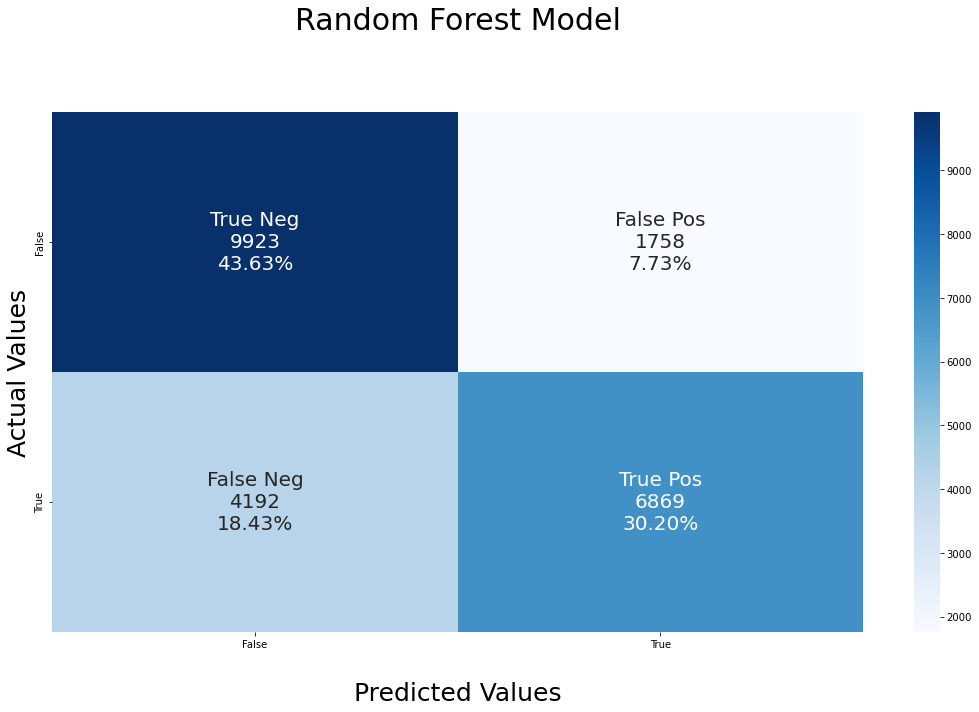

In [29]:
predicted_rf = rf.predict(X)

tp = np.sum((y == 1) & (predicted_rf == 1))
fp = np.sum((y == 0) & (predicted_rf == 1))
tn = np.sum((y == 0) & (predicted_rf == 0))
fn = np.sum((y == 1) & (predicted_rf == 0))

# print(confusion_matrix(y, predicted_rf))
cmrf = confusion_matrix( y, rf.predict(X))
# ConfusionMatrixDisplay(cmrf).plot()
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cmrf.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cmrf.flatten()/np.sum(cmrf)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

fig, ax = plt.subplots(figsize = (15,10))

ax = sns.heatmap(cmrf, annot=labels, fmt='', cmap='Blues', annot_kws={"size":20})

ax.set_title('Random Forest Model\n\n', fontsize=30, pad=15);
ax.set_xlabel('\nPredicted Values', fontsize=25)
ax.set_ylabel('Actual Values', fontsize=25);
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
# specificity: True Negative Rate
specificity = tn / (tn + fp)

# sensitivity aka recall: True Positive Rate
recall = recall_score(y, predicted_rf)

# total correct classifications
correct_classifications = tp + tn
# all classifications
all_classifications = tp + fp + tn + fn

# specificity
print(f'Our RandomForest model correctly predicted {specificity:.2f}% of the not-hot posts.')
# sensitivity
print(f'Our RandomForest model correctly predicted {recall:.2f}% of the actual accuracy of hot posts.')
# accuracy
print(f'Our RandomForest model correctly predicted {correct_classifications / all_classifications:.2f}% overall score of posts.')

Our RandomForest model correctly predicted 0.85% of the not-hot posts.
Our RandomForest model correctly predicted 0.62% of the actual accuracy of hot posts.
Our RandomForest model correctly predicted 0.74% overall score of posts.


**Gradient Boosting Classifier model**

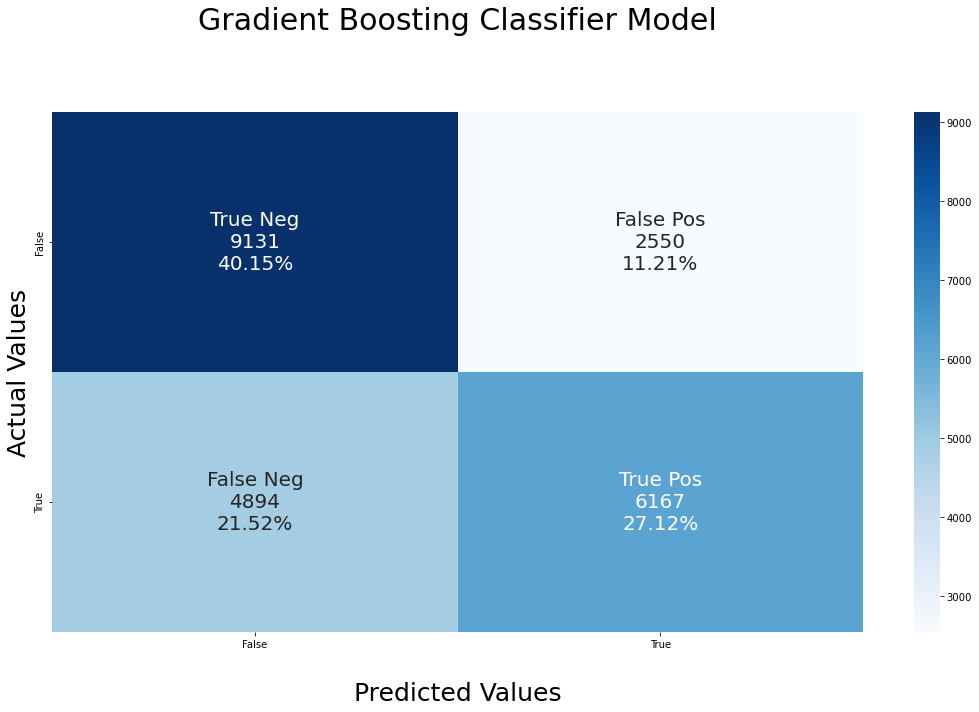

In [31]:
predicted_gb = gb.predict(X)

tp = np.sum((y == 1) & (predicted_gb == 1))
fp = np.sum((y == 0) & (predicted_gb == 1))
tn = np.sum((y == 0) & (predicted_gb == 0))
fn = np.sum((y == 1) & (predicted_gb == 0))

# print(confusion_matrix(y, predicted_gb))
cmgb = confusion_matrix( y, gb.predict(X))
# ConfusionMatrixDisplay(cmgb).plot()

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cmgb.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cmgb.flatten()/np.sum(cmgb)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

fig, ax = plt.subplots(figsize = (15,10))

ax = sns.heatmap(cmgb, annot=labels, fmt='', cmap='Blues', annot_kws={"size":20})

ax.set_title('Gradient Boosting Classifier Model\n\n', fontsize=30, pad=15);
ax.set_xlabel('\nPredicted Values', fontsize=25)
ax.set_ylabel('Actual Values', fontsize=25);
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [32]:
# specificity: True Negative Rate
specificity = tn / (tn + fp)

# sensitivity aka recall: True Positive Rate
recall = recall_score(y, predicted_gb)

# total correct classifications
correct_classifications = tp + tn
# all classifications
all_classifications = tp + fp + tn + fn

# specificity
print(f'Our GradientBoostingClassifier model correctly predicted {specificity:.2f}% of the not-hot posts.')
# sensitivity
print(f'Our GradientBoostingClassifier model correctly predicted {recall:.2f}% of the actual accuracy of hot posts.')
# accuracy
print(f'Our GradientBoostingClassifier model correctly predicted {correct_classifications / all_classifications:.2f}% overall score of posts.')

Our GradientBoostingClassifier model correctly predicted 0.78% of the not-hot posts.
Our GradientBoostingClassifier model correctly predicted 0.56% of the actual accuracy of hot posts.
Our GradientBoostingClassifier model correctly predicted 0.67% overall score of posts.


**KNeighbors Classifier model**

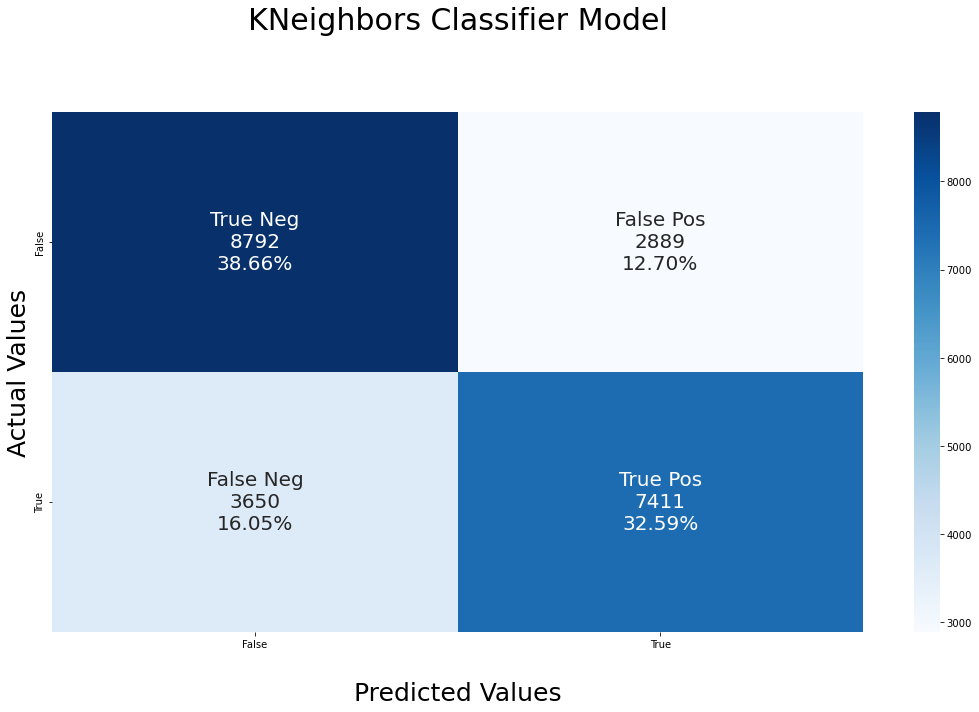

In [33]:
predicted_knn = knn.predict(X)

tp = np.sum((y == 1) & (predicted_knn == 1))
fp = np.sum((y == 0) & (predicted_knn == 1))
tn = np.sum((y == 0) & (predicted_knn == 0))
fn = np.sum((y == 1) & (predicted_knn == 0))
# print(confusion_matrix(y, predicted_knn))
cmknn = confusion_matrix(y , knn.predict(X))
# ConfusionMatrixDisplay(cmknn).plot()


group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cmknn.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cmknn.flatten()/np.sum(cmknn)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

fig, ax = plt.subplots(figsize = (15,10))

ax = sns.heatmap(cmknn, annot=labels, fmt='', cmap='Blues', annot_kws={"size":20})

ax.set_title('KNeighbors Classifier Model\n\n', fontsize=30, pad=15);
ax.set_xlabel('\nPredicted Values', fontsize=25)
ax.set_ylabel('Actual Values', fontsize=25);
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [34]:
# specificity: True Negative Rate
specificity = tn / (tn + fp)

# sensitivity aka recall: True Positive Rate
recall = recall_score(y, predicted_knn)

# total correct classifications
correct_classifications = tp + tn
# all classifications
all_classifications = tp + fp + tn + fn

# specificity
print(f'Our KNeighborsClassifier model correctly predicted {specificity:.2f}% of the not-hot posts.')
# sensitivity
print(f'Our KNeighborsClassifier model correctly predicted {recall:.2f}% of the actual accuracy of hot posts.')
# accuracy
print(f'Our KNeighborsClassifier model correctly predicted {correct_classifications / all_classifications:.2f}% overall score of posts.')

Our KNeighborsClassifier model correctly predicted 0.75% of the not-hot posts.
Our KNeighborsClassifier model correctly predicted 0.67% of the actual accuracy of hot posts.
Our KNeighborsClassifier model correctly predicted 0.71% overall score of posts.


**Logistic Regression model**

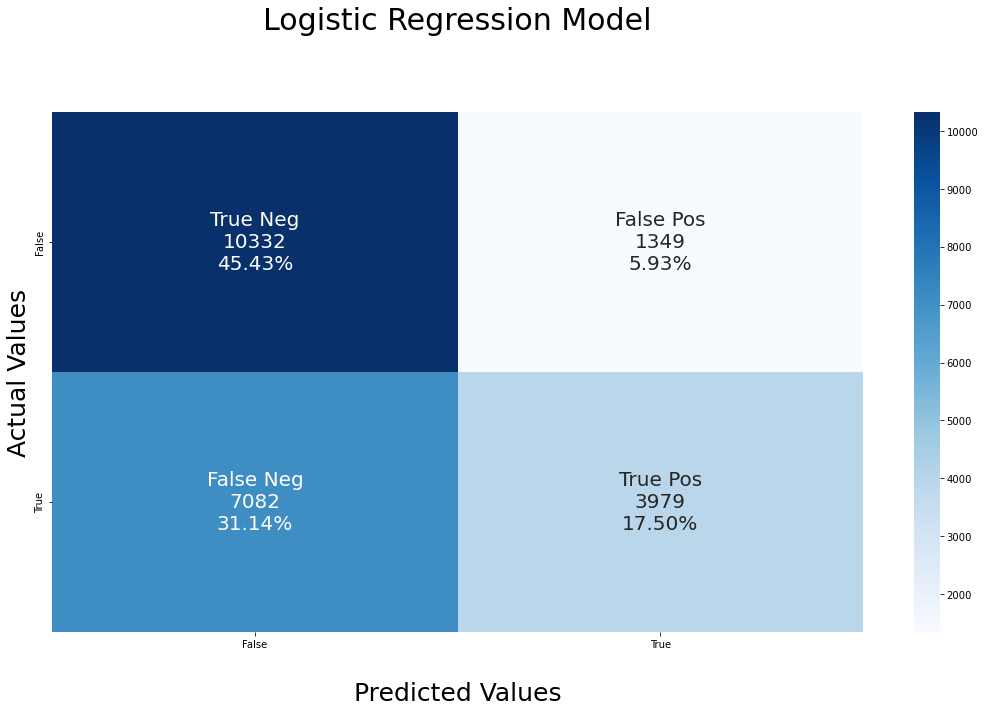

In [35]:
predicted_logreg = logreg.predict(X)

tp = np.sum((y == 1) & (predicted_logreg == 1))
fp = np.sum((y == 0) & (predicted_logreg == 1))
tn = np.sum((y == 0) & (predicted_logreg == 0))
fn = np.sum((y == 1) & (predicted_logreg == 0))
# print(confusion_matrix(y, predicted_logreg))


cmlogreg = confusion_matrix(y , logreg.predict(X))
# ConfusionMatrixDisplay(cmknn).plot()

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cmlogreg.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cmlogreg.flatten()/np.sum(cmlogreg)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

fig, ax = plt.subplots(figsize = (15,10))

ax = sns.heatmap(cmlogreg, annot=labels, fmt='', cmap='Blues', annot_kws={"size":20})

ax.set_title('Logistic Regression Model\n\n', fontsize=30, pad=15);
ax.set_xlabel('\nPredicted Values', fontsize=25)
ax.set_ylabel('Actual Values', fontsize=25);
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [36]:
# specificity: True Negative Rate
specificity = tn / (tn + fp)

# sensitivity aka recall: True Positive Rate
recall = recall_score(y, predicted_logreg)

# total correct classifications
correct_classifications = tp + tn
# all classifications
all_classifications = tp + fp + tn + fn

# specificity
print(f'Our LogisticRegression model correctly predicted {specificity:.2f}% of the not-hot posts.')
# sensitivity
print(f'Our LogisticRegression model correctly predicted {recall:.2f}% of the actual accuracy of hot posts.')
# accuracy
print(f'Our LogisticRegression model correctly predicted {correct_classifications / all_classifications:.2f}% overall score of posts.')

Our LogisticRegression model correctly predicted 0.88% of the not-hot posts.
Our LogisticRegression model correctly predicted 0.36% of the actual accuracy of hot posts.
Our LogisticRegression model correctly predicted 0.63% overall score of posts.


## The best among all 4 models is... GradientBoosting Model! It has predicted the most accurate score.
### LogisticRegressionCV seem to have over fit & GradientBoosting curbs overfitting & trains faster.
- Our GradientBoostingClassifier model correctly predicted 0.76% of the not-hot posts.
- Our GradientBoostingClassifier model correctly predicted 0.58% of the actual accuracy of hot posts.
- Our GradientBoostingClassifier model correctly predicted 0.67% overall score of posts.Our GradientBoostingClassifier model correctly predicted 0.76% of the not-hot posts.

**improtant features in models Interpretations**

- time_posted_scaled seems to be the most important feature, 
- Certain words are more important than subreddit tags vise versa.

**Importance variables in Logistic RegressionCV**

In [37]:
cf = pd.DataFrame({'Variable':X.columns, 'Coefficients':np.expm1(logreg.coef_[0])}).sort_values('Coefficients', ascending=False)
cf.head(7)

,Variable,Coefficients
99,year,0.027187
55,new,0.026588
21,game,0.026485
59,people,0.025310
68,say,0.022975
50,man,0.021360
39,know,0.017620


**LOGREG interpretation**
- The top coefs push you to the most POSITIVE CLASS not the most powerful(importance)
- For each unit change in the variable, the positive class is that times more likely.
- The subreddit_title are more important than words in titles.
- man, year, say & new was also important key words that were in subreddits hot posts I assume they could be correlated to all sporting events that happened the day we scraped.

**Importance variables in Random Forest**

In [38]:
vrf = pd.DataFrame({'Variable':X.columns, 'Importance':rf.feature_importances_}).sort_values('Importance', ascending=False)
vrf.head(7)

,Variable,Importance
110,time_posted_scaled,0.585047
21,game,0.012964
99,year,0.012761
59,people,0.012019
55,new,0.011479
68,say,0.010654
37,just,0.010276


**RF interpretation**
- We just know they were important in making the decision. 
- These features may have importance related to a game going on.
- The key words game & people are one of the top features trending the day we scraped for posts, there was an NBA game and other sporting events on while I was only scraping data for that one day.
- time_posted seems to be correlated towards the time a post was posted during trending subreddit such as the  words people & games, as an NBA game possibly was on during this time period.
- Man, year, say & new was also important key words that were in subreddits hot posts I assume they could be correlated to all sporting events that happened the day we scraped.

**Importance variables in Gradient Boosting Classifier**

In [39]:
vgb = pd.DataFrame({'Variable':X.columns, 'Importance':gb.feature_importances_}).sort_values('Importance', ascending=False)
vgb.head(7)

,Variable,Importance
110,time_posted_scaled,0.794519
21,game,0.017756
59,people,0.012393
99,year,0.010162
55,new,0.009631
68,say,0.008336
39,know,0.006949


**GB interpretation**
- Like Random forest these are importances not like the Coefficients.
- time_posted is once again the most important variable in correlation to game & possibly correlation to people.
- Sporting events were trending around the same time so it is correlated to game, people, woman & time_post when I was scraping the data.

# Conclusions & Recommendations

Scenario
You're fresh out of your Data Science bootcamp and looking to break through in the world of freelance data journalism. Nate Silver and co. at FiveThirtyEight have agreed to hear your pitch for a story in two weeks!

Your piece is going to be on how to create a Reddit post that will get the most engagement from Reddit users. Because this is FiveThirtyEight, you're going to have to get data and analyze it in order to make a compelling narrative.

- **Based on my problem statement and work, I have concluded, That my model predicts what words make a post that get above the baseline of comments which are hot subreddit posts.**
- **For future iteration  I will run Sigma(my data scrape script) alot longer as 1 day of scraping data isn't enough to use to train the model for scores.**
- **The model  score of Not Hot post are more accurate than the Hot post score, I think I need more data in order to improve the models overall.**
- **time_posted doesn't seem to effect the num_comments a post have from the data collected and interpretations.**
- **Hot post typically trends for around a day then gets pushed down by new hot posts which seems to not effect num_comments in contrary to age of post.**
- **With the findings I have with my model scores and trend can determine which subreddit post company's can template and use to make FiveThirtyEight get more views and interaction on each new post.**